In [119]:
import tensorflow as tf
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

# Generate a simple binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                            n_clusters_per_class=1, class_sep=1.5, random_state=42)
y = y.reshape(-1, 1)  # Reshape y to be compatible with Keras

# Define a simple perceptron model
model = Sequential([
    Dense(3, activation='tanh'),  # Single perceptron
    Dense(3, activation='tanh'),  # Single perceptron
    Dense(3, activation='tanh')
])

# Compile the model
optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# Train the model for one epoch
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4283 - loss: 0.5818  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4435 - loss: 0.2682 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4883 - loss: 0.1933 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4381 - loss: 0.1467 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4890 - loss: 0.1141 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5321 - loss: 0.0814 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5959 - loss: 0.0569 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5424 - loss: 0.0388 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5963 - loss: 0.0298 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5292 - loss: 0.0162 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.0170 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [120]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (10, 3)                │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (10, 3)                │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (10, 3)                │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (144.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [121]:
x_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
with tf.GradientTape() as t:
    t.watch(x_tensor)
    output = model(x_tensor)

result = output
gradients = t.gradient(output, x_tensor).numpy()
preds = model.predict(X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(array([[50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.],
        [50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.],
        [50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]]),
 array([-0.02908494,  0.07178894,  0.17266281,  0.27353668,  0.37441054,
         0.47528443,  0.57615829,  0.67703217,  0.77790606,  0.87877989,
         0.97965378]),
 <a list of 3 BarContainer objects>)

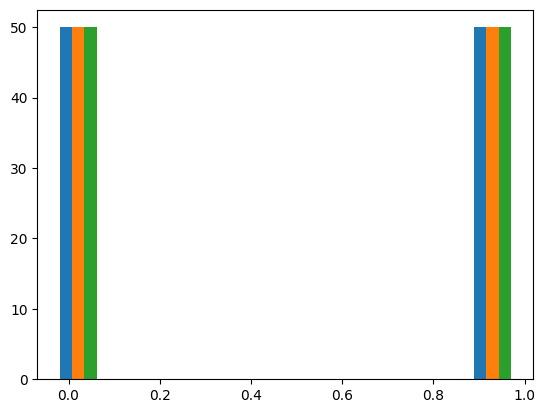

In [122]:
#plotten Sie ein histogram der Vorhersagen, den Mittelwert der Gradienten pro Vorhersage, plotten Sie dann den Fehler vs. die Gradienten
plt.hist(preds)

(array([ 1.,  1.,  2., 47., 22.,  9.,  6.,  4.,  5.,  3.]),
 array([-0.09917451, -0.06970153, -0.04022855, -0.01075557,  0.01871741,
         0.04819039,  0.07766338,  0.10713635,  0.13660933,  0.16608232,
         0.1955553 ]),
 <BarContainer object of 10 artists>)

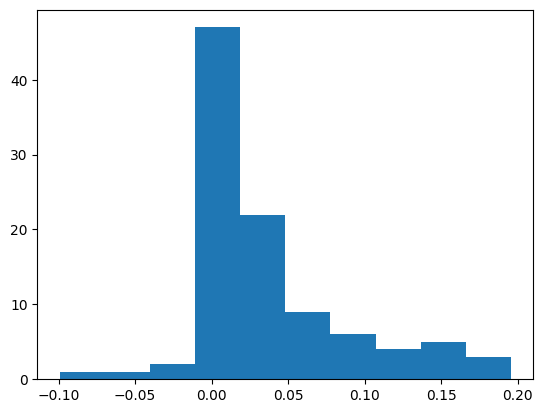

In [123]:
mean_gradients = np.mean(gradients, axis=1)
plt.hist(mean_gradients, bins=10)

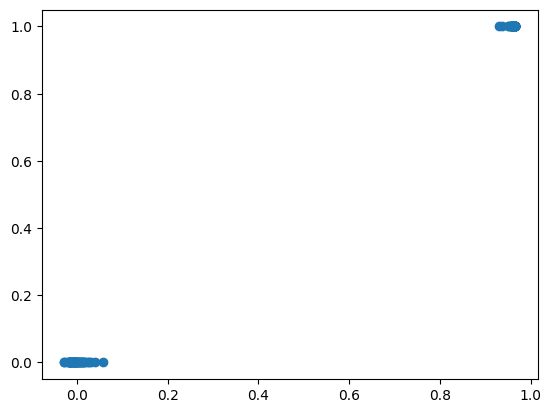

In [136]:
plt.scatter(preds[:, 0], y)

(array([[38.,  5.,  4.,  1., 26., 12.,  6.,  3.,  1.,  1.,  0.,  1.,  0.,
          0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [36., 25., 19., 11.,  2.,  3.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
          0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [27., 11.,  4., 15., 14., 12.,  2.,  5.,  2.,  2.,  1.,  0.,  2.,
          0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  1.]]),
 array([9.42762668e-09, 2.68382062e-04, 5.36754696e-04, 8.05127331e-04,
        1.07349997e-03, 1.34187260e-03, 1.61024523e-03, 1.87861787e-03,
        2.14699050e-03, 2.41536314e-03, 2.68373577e-03, 2.95210841e-03,
        3.22048104e-03, 3.48885368e-03, 3.75722631e-03, 4.02559894e-03,
        4.29397158e-03, 4.56234421e-03, 4.83071685e-03, 5.09908948e-03,
        5.36746212e-03, 5.63583475e-03, 5.90420739e-03, 6.17258002e-03,
        6.44095265e-03, 6.709325

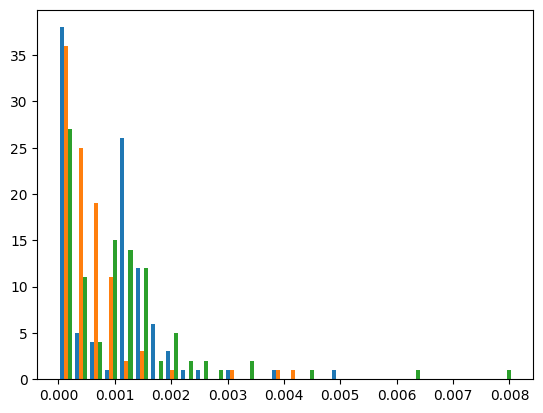

In [137]:
plt.hist((preds - y)**2, bins=30)

In [126]:
# lassen sie das modell nun für 100 Epochen trainieren und fertigen Sie die obrigen plots erneut an und vergleichen sie diese


code from 

In [127]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

In [128]:
num_classes = 2
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_picks = np.logical_or(y_train==2,y_train==7)
test_picks = np.logical_or(y_test==2,y_test==7)

x_train = x_train[train_picks]
x_test = x_test[test_picks]

y_train = np.array(y_train[train_picks]==7,dtype=int)
y_test = np.array(y_test[test_picks]==7,dtype=int)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (12223, 28, 28, 1)
12223 train samples
2060 test samples


In [129]:
model = Sequential()

model.add(Conv2D(32, [3, 3], input_shape = input_shape)) 
model.add(Activation("relu"))
model.add(Conv2D(64, [3, 3],))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/home/mmr/.pyenv/versions/3.12.7/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
hist = model.fit(x_train[:2], y_train[:2], batch_size=64, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6208 - val_accuracy: 0.7680 - val_loss: 0.6438
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 1.0000 - loss: 0.4787 - val_accuracy: 0.8932 - val_loss: 0.5975
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.5000 - loss: 0.7984 - val_accuracy: 0.8762 - val_loss: 0.5408
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 1.0000 - loss: 0.2964 - val_accuracy: 0.9097 - val_loss: 0.4876
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 1.0000 - loss: 0.4089 - val_accuracy: 0.9398 - val_loss: 0.4279
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 1.0000 - loss: 0.2172 - val_accuracy: 0.9408 - val_loss: 0.3768
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 1.0000 - loss: 0.1831 - val_accuracy: 0.9408 - val_loss: 0.3283
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 1.0000 - loss: 0.1571 - val_accuracy: 0.9393 - val_loss: 0.

In [131]:
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test score:', score[0])
print('Test accuracy:', score[1])

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9242 - loss: 0.2784

Test score: 0.2260434329509735
Test accuracy: 0.9427184462547302


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


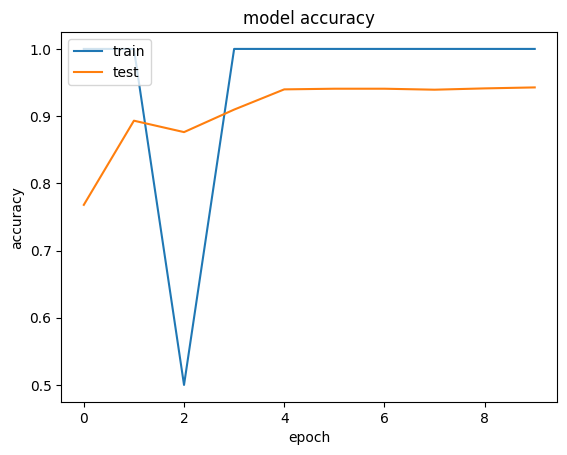

In [132]:
import matplotlib.pyplot as plt
# list all keys in history
print(hist.history.keys())

# visualize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<class 'numpy.ndarray'> (3, 3, 32)

Filter 1 in the first convolution layer : 
[[ 0.10518394  0.01194131  0.08477795]
 [-0.06892841 -0.12385543  0.08508679]
 [-0.01718661  0.12073955  0.08965068]]


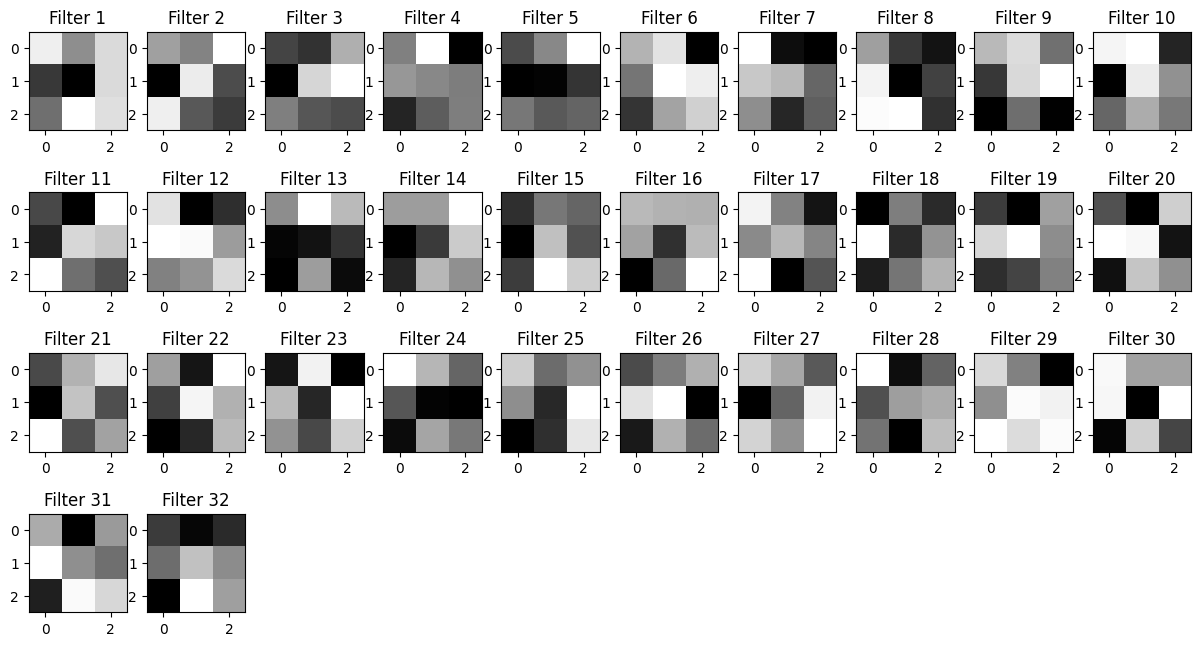

In [133]:
# get the weights of the first convolution layer and visualize the 32 filters

W1 = model.layers[0].get_weights()[0]
W1 = model.layers[0].get_weights()[0][:,:,0,:]

print(type(W1), W1.shape)
print()
print("Filter 1 in the first convolution layer : ")
print(W1[:,:,0])

plt.figure(1, figsize=(15,8))

for i in range(0,32):
    plt.subplot(4,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(W1[:,:,i],interpolation="nearest",cmap="gray")
    
plt.show()

In [134]:
# extract output of the first convolution layer and plot the images from the 32 filters

model2 = Sequential()
model2.add(Conv2D(32, [3, 3], border_mode='same', weights=model.layers[0].get_weights(), input_shape=input_shape))
model2.add(Activation("relu"))

x_rep = model2.predict(x_test[0:10]) # representation of the first 10 test samples
x_rep_1 = x_rep[0,:,:,:]  # only look into the first test sample, which is a 7 digit
print(x_rep_1.shape)

plt.figure(1, figsize=(15,8))

for i in range(0,32):
    plt.subplot(4,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(x_rep_1[:,:,i],interpolation="nearest",cmap="gray")
    
plt.show()

ValueError: Unrecognized keyword arguments passed to Conv2D: {'border_mode': 'same', 'weights': [array([[[[ 0.10518394,  0.03138525, -0.0224034 , -0.01561266,
          -0.04611535,  0.02624521,  0.13918091,  0.02877116,
           0.07646902,  0.11854821, -0.04005913,  0.10919062,
          -0.01828477,  0.04044442, -0.06117887,  0.03741976,
           0.11262916, -0.09042878, -0.06627618, -0.05619418,
          -0.07796057, -0.01658375, -0.11789413,  0.12596662,
           0.09394448,  0.03192927,  0.08310419,  0.09324239,
           0.1055038 ,  0.10441618,  0.01381526, -0.07518822]],

        [[ 0.01194131,  0.00247346, -0.03737639,  0.10962169,
           0.01427646,  0.06177911, -0.12595558, -0.06360342,
           0.1081483 ,  0.12993889, -0.09392863, -0.13684577,
           0.07821476,  0.04045781,  0.00521685,  0.03134293,
          -0.00133117,  0.01706347, -0.12998664, -0.14353691,
           0.00798812, -0.11477567,  0.1128092 ,  0.05621709,
           0.03177962,  0.06315048,  0.04490372, -0.12217864,
           0.01778268,  0.0202966 , -0.13424619, -0.12248065]],

        [[ 0.08477795,  0.13028751,  0.06591241, -0.14272773,
           0.13276543, -0.10813699, -0.14067021, -0.0968505 ,
           0.01046005, -0.10180717,  0.0975198 , -0.08608923,
           0.02011725,  0.14956087, -0.01108195,  0.0296768 ,
          -0.11270093, -0.05405715,  0.03693914,  0.07601663,
           0.05099803,  0.0521327 , -0.14019383, -0.02131596,
           0.05520884,  0.09453204, -0.02663806, -0.04572863,
          -0.11289497,  0.02022242, -0.00138215, -0.09033716]]],


       [[[-0.06892841, -0.13379897, -0.0788523 ,  0.00693674,
          -0.12151273, -0.02037242,  0.07814818,  0.10579196,
          -0.04079319, -0.140361  , -0.06846987,  0.14154276,
          -0.13270034, -0.1333544 , -0.10501833,  0.01755832,
           0.00709833,  0.1274429 ,  0.09522647,  0.12718298,
          -0.13836798, -0.08447301,  0.05550248, -0.03565379,
           0.05319611,  0.12579362, -0.11151531, -0.06273345,
           0.03135089,  0.10272203,  0.08641334, -0.0307643 ]],

        [[-0.12385543,  0.11056484,  0.09857099, -0.00783366,
          -0.11798562,  0.08234567,  0.06236339, -0.11476492,
           0.10608265,  0.10897902,  0.06727776,  0.13554671,
          -0.12182155, -0.06900898,  0.07237891, -0.08001035,
           0.05281982, -0.05459083,  0.13643204,  0.11970827,
           0.02238128,  0.04437973, -0.1004495 , -0.11435355,
          -0.01220393,  0.14335178, -0.0180415 ,  0.00649216,
           0.14029804, -0.136316  , -0.01014119,  0.04514785]],

        [[ 0.08508679, -0.05476494,  0.1325591 , -0.01908618,
          -0.06930382,  0.06951989, -0.02835915, -0.05620104,
           0.140693  ,  0.01373952,  0.0557503 ,  0.03342152,
          -0.09416517,  0.0912825 , -0.02893684,  0.03936543,
           0.00141937,  0.03588009,  0.01754024, -0.12313014,
          -0.07361614, -0.00396468,  0.12709841, -0.11785325,
           0.1258382 , -0.01432132,  0.11488027,  0.01949975,
           0.13085912,  0.11071745, -0.0381911 , -0.00301722]]],


       [[[-0.01718661,  0.11297239,  0.02642763, -0.10662507,
          -0.00234981, -0.06871121,  0.01502438,  0.11219995,
          -0.09091511, -0.03242321,  0.09754368,  0.0040546 ,
          -0.13732456, -0.09139671, -0.0489778 , -0.12164903,
           0.12503473, -0.06497445, -0.08166981, -0.12657294,
           0.07099567, -0.13014533,  0.01276439, -0.10733642,
          -0.03777914,  0.00122172,  0.08683947, -0.03194398,
           0.14462225, -0.13143466, -0.10737768, -0.12851554]],

        [[ 0.12073955, -0.0427014 , -0.00744721, -0.05031458,
          -0.03140446,  0.01362457, -0.09883878,  0.11573641,
           0.00925059,  0.04196446, -0.01052242,  0.02305092,
          -0.00447208,  0.06983554,  0.1312184 , -0.03080669,
          -0.13288838,  0.00994091, -0.0588578 ,  0.06483971,
          -0.07345767, -0.10182085, -0.06425006,  0.03943548,
          -0.00740543,  0.09488627,  0.02431749, -0.13416848,
           0.10847898,  0.06583401,  0.0817778 ,  0.10094517]],

        [[ 0.08965068, -0.07209343, -0.01551752, -0.01830486,
          -0.02155577,  0.04664934, -0.03648977, -0.07120272,
          -0.08917025, -0.01317903, -0.0343105 ,  0.10074481,
          -0.12779564,  0.02609029,  0.08530205,  0.09814609,
          -0.04762408,  0.06292273,  0.00428181,  0.00900181,
          -0.00524711,  0.00269515,  0.07795891, -0.0027236 ,
           0.10990926,  0.0527818 ,  0.12753145,  0.03492292,
           0.1405609 , -0.0689532 ,  0.0513543 ,  0.0146671 ]]]],
      dtype=float32), array([-5.90133306e-04,  9.28594673e-04, -4.63306671e-04,  2.54879938e-03,
       -1.20112905e-04, -6.52135536e-03,  3.11349612e-03,  2.20612786e-03,
        4.20282269e-03, -3.43264872e-03,  2.73434795e-03,  6.76545082e-04,
       -3.65050137e-03,  8.63960886e-05,  5.37551520e-03, -3.17686936e-03,
        7.41405413e-04,  4.69483668e-03,  5.70074841e-03, -3.66842817e-03,
       -5.27449884e-04,  8.89785588e-06, -4.27415781e-03, -4.64472035e-03,
       -4.52864042e-05,  2.36023613e-03, -1.10998249e-03,  5.27574914e-04,
       -1.09830278e-03, -6.09562267e-03,  5.32967318e-03, -3.36793426e-04],
      dtype=float32)]}

In [52]:
# extract output of the second convolution layer and plot the images from the 64 filters

model3 = Sequential()
model3.add(Conv2D(32, [3, 3], border_mode='same', weights=model.layers[0].get_weights(), input_shape=input_shape))
model3.add(Activation("relu"))
model3.add(Conv2D(64, [3, 3], border_mode='same', weights=model.layers[2].get_weights()))
model3.add(Activation("relu"))

x_rep = model3.predict(x_test[0:10]) # representation of the first 10 test samples
x_rep_1 = x_rep[0,:,:,:]  # only look into the first test sample, which is a 7 digit
print(x_rep_1.shape)

plt.figure(1, figsize=(15,8))

for i in range(0,64):
    plt.subplot(7,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(x_rep_1[:,:,i],interpolation="nearest",cmap="gray")
    
plt.show()

ValueError: Unrecognized keyword arguments passed to Conv2D: {'border_mode': 'same', 'weights': [array([[[[-0.03296227, -0.06868602,  0.05534198,  0.03509705,
          -0.09319505, -0.10015558, -0.12054896, -0.12721162,
           0.01266391,  0.0944092 ,  0.13098833,  0.08338681,
           0.05610546, -0.02336531,  0.04512095, -0.07346042,
          -0.09033094, -0.01488291, -0.04658511,  0.01584831,
          -0.0250265 , -0.00263883, -0.00528057, -0.09482781,
          -0.02787184, -0.05963756, -0.11311778,  0.01041904,
           0.12759632,  0.01227745, -0.02131324,  0.02567749]],

        [[-0.06600847,  0.06818106, -0.00078171, -0.05275951,
           0.01730211, -0.01485332, -0.01124172,  0.13657293,
           0.08554243, -0.01751715,  0.04718599, -0.09955785,
          -0.1251264 ,  0.0280258 , -0.13011086, -0.12052141,
           0.0564097 , -0.10375007, -0.122435  , -0.07755002,
           0.07687189, -0.13835934,  0.14348349, -0.11647137,
          -0.09190496,  0.1053893 , -0.06916779,  0.04463964,
           0.09875841, -0.010648  ,  0.07814483,  0.00581096]],

        [[ 0.06825078, -0.11520259, -0.03744296, -0.13526478,
           0.1290959 ,  0.06381502,  0.05232659,  0.09913522,
           0.0068677 ,  0.01509093, -0.1102377 , -0.03928357,
          -0.13042066,  0.08981444,  0.11936615,  0.01112674,
           0.06458258,  0.07086233,  0.1444685 , -0.12824734,
           0.02789188,  0.12241878, -0.091305  ,  0.0159812 ,
           0.0721029 ,  0.08921517, -0.00164247,  0.09824485,
          -0.13953382,  0.13398351, -0.0093035 , -0.03066693]]],


       [[[-0.11568418, -0.10479166,  0.07932667, -0.08411738,
          -0.12131222, -0.09453634, -0.07339044, -0.10337649,
           0.0042368 , -0.06921659,  0.13928743, -0.12685086,
           0.08073536, -0.12613828,  0.14838235,  0.08588351,
           0.11905157, -0.06961334,  0.1123924 , -0.12978469,
          -0.08118682,  0.07445996,  0.13008982, -0.06367459,
           0.02547634, -0.06452896, -0.05092695,  0.10908971,
           0.03172543, -0.08884966,  0.1379103 ,  0.06382889]],

        [[-0.02881612, -0.04044265,  0.13833448,  0.07427806,
           0.12048994, -0.0373436 , -0.08693264, -0.0527336 ,
           0.07319099,  0.14661463, -0.0020996 , -0.07555278,
           0.00881101,  0.06582016,  0.14665274, -0.08808639,
          -0.03594837,  0.02471367,  0.12907901,  0.07158155,
           0.07806744, -0.07207657, -0.09506499, -0.01520339,
           0.06304607,  0.144315  , -0.01953761,  0.09709482,
           0.08027849, -0.08059435, -0.13095263,  0.05222181]],

        [[-0.10543974, -0.05089078, -0.1230591 , -0.01236635,
          -0.02005291, -0.07717074,  0.09564108,  0.02854642,
          -0.06401921,  0.11647063,  0.06040175,  0.08750201,
           0.08341251,  0.10550622, -0.06244785, -0.12661774,
          -0.12240147, -0.10986137,  0.10803875, -0.00309526,
           0.03732488, -0.13013668,  0.11860385, -0.03713584,
           0.12300219,  0.12140428, -0.04913495, -0.05714488,
           0.01385638,  0.00690558,  0.04270856, -0.0902696 ]]],


       [[[ 0.10534114, -0.09132497, -0.04053849, -0.0954235 ,
          -0.03090822,  0.10100838,  0.07588663, -0.07962784,
           0.10423529,  0.10687831, -0.02207409, -0.10127383,
           0.08205277,  0.12725022, -0.07127117,  0.01132359,
          -0.02753545, -0.05546348, -0.13238595,  0.13379578,
           0.05043736,  0.07968654, -0.02947529, -0.11912648,
          -0.05547617, -0.11339817, -0.12591839,  0.11880858,
           0.06419609, -0.04569059,  0.02110255, -0.03185037]],

        [[-0.1260468 , -0.05342784,  0.14474522, -0.073533  ,
          -0.02131938,  0.0001619 , -0.10572664,  0.06914773,
           0.01766276,  0.13537976,  0.09613852,  0.03203396,
          -0.02004203, -0.11176017,  0.10724993, -0.02323637,
          -0.07263487, -0.0992718 , -0.13213813,  0.05059648,
           0.00290484, -0.05311889,  0.00149559,  0.08164863,
          -0.11322595, -0.03025333,  0.04783313, -0.10737242,
          -0.01978759, -0.00823277,  0.0904515 ,  0.10294894]],

        [[-0.04734636,  0.00906258, -0.07919376,  0.12490256,
          -0.0086509 ,  0.08945527, -0.05688363,  0.01714458,
          -0.05439639, -0.00683191, -0.08564746,  0.01942112,
          -0.02719177, -0.09110535, -0.1076692 ,  0.11609432,
          -0.02363846,  0.02544327,  0.08220322, -0.08374711,
           0.10501874,  0.03826946,  0.09205369, -0.09044874,
           0.05855285,  0.1105164 , -0.11902797, -0.01445865,
           0.09920147, -0.04186862,  0.14560637, -0.02329785]]]],
      dtype=float32), array([ 1.0989518e-03, -4.7866809e-03,  1.6631414e-04,  2.4049273e-03,
       -3.5604896e-04,  1.9875725e-04,  6.2967330e-04, -2.4330779e-03,
       -1.4611981e-03, -1.4268161e-03, -2.0799446e-03, -5.0465022e-03,
       -1.6425167e-03, -1.5061923e-03, -7.7398028e-04,  2.7839001e-03,
       -2.0199122e-03,  1.1512577e-03,  5.3932320e-04,  5.4849556e-04,
       -4.8047033e-05,  1.3533303e-03, -2.5281229e-03, -2.3755212e-03,
        6.0293428e-04, -2.2986438e-05, -4.1830977e-03, -1.7129058e-03,
       -6.2713153e-03, -3.2027250e-03, -2.0351298e-03,  1.9549055e-03],
      dtype=float32)]}